# 3. Exploratory Analysis

## Hypothesis

The content in the article can be used to predict an appropriate content tag. To avoid dealing with multiple outcome buckets for a single observation, I will use the article_subtopic field as the outcome bucket. This represents the article's primary tag. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

/Users/sedkin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
Location = r'./clean_data.csv'
df = pd.read_csv(Location,  encoding='utf-8')

In [3]:
df.head()

,article_description,article_pubtime,article_section,article_subtopic,article_tags,article_topic,author_name,content,title
0,If you're having trouble trying to be more inn...,2016-11-11T20:00:15+00:00,Planning for Growth,Growth Opportunities,"[Growth Opportunities, Innovation, Personal Pr...",Planning for Growth,Heather Willems,The Power of Non-Linear ThinkingHeather Willem...,The Power of Non-Linear Thinking
1,Huge growth may be possible for businesses of ...,2016-11-09T22:30:34+00:00,Planning for Growth,Operations,"[Business Expansion, Business Plan, Cash Flow,...",Planning for Growth,Andrew J. Sherman,3 Growth Strategies for Businesses With Limite...,3 Growth Strategies for Businesses With Limite...
2,What sets your business apart from the competi...,2016-11-11T22:30:47+00:00,Getting Customers,Marketing & Sales,"[Advertising, Brainstorming, Branding, Busines...",Getting Customers,Rieva Lesonsky,USP 101: How to Uncover Your Unique Selling Pr...,USP 101: How to Uncover Your Unique Selling Pr...
3,"Organizational changes are rarely fun or easy,...",2016-11-03T23:30:02+00:00,Building Your Team,Company Culture,"[Building Your Team, Business Expansion, Busin...",Building Your Team,David Niu,8 Strategies for Big (or Small) Organizational...,8 Strategies for Big (or Small) Organizational...
4,"When expanding your business, exporting to int...",2016-10-27T19:00:39+00:00,Planning for Growth,Growth Opportunities,"[Growth Opportunities, Importing & Exporting, ...",Planning for Growth,Greg Sandler,Lessons Learned: Four Stories From Experienced...,Lessons Learned: Four Stories From Experienced...


In [4]:
# # spacy for pre-processing and traditional NLP
# import spacy
# from spacy.en import English

# # Initializing the nlp_toolkit
# nlp_toolkit = English()

In [5]:
# content = unicode(df.loc[0]['content'], "utf-8")
# parsed = nlp_toolkit(content)

# for i, word in enumerate(parsed): 
#     print "Word: {}".format(word)
#     print "\t Phrase type: {}".format(word.dep_)
#     print "\t Is the word a known entity type? {}".format(
#         word.ent_type_  if word.ent_type_ else "No")
#     print "\t Lemma: {}".format(word.lemma_)
#     print "\t Parent of this word: {}".format(word.head.lemma_)

In [6]:
content = df['content']
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words='english',
                             binary=True)

# Use `fit` to learn the vocabulary of the titles
vectorizer.fit(content)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(content)
print type(X)
print X.shape
print X
X.toarray()

<class 'scipy.sparse.csr.csr_matrix'>
(83, 1000)
  (0, 12)	1
  (0, 13)	1
  (0, 27)	1
  (0, 52)	1
  (0, 55)	1
  (0, 61)	1
  (0, 66)	1
  (0, 68)	1
  (0, 69)	1
  (0, 73)	1
  (0, 82)	1
  (0, 85)	1
  (0, 97)	1
  (0, 98)	1
  (0, 103)	1
  (0, 107)	1
  (0, 113)	1
  (0, 123)	1
  (0, 128)	1
  (0, 130)	1
  (0, 134)	1
  (0, 144)	1
  (0, 162)	1
  (0, 183)	1
  (0, 191)	1
  :	:
  (82, 836)	1
  (82, 845)	1
  (82, 872)	1
  (82, 888)	1
  (82, 889)	1
  (82, 890)	1
  (82, 894)	1
  (82, 895)	1
  (82, 896)	1
  (82, 900)	1
  (82, 903)	1
  (82, 905)	1
  (82, 909)	1
  (82, 923)	1
  (82, 924)	1
  (82, 936)	1
  (82, 937)	1
  (82, 940)	1
  (82, 942)	1
  (82, 959)	1
  (82, 961)	1
  (82, 965)	1
  (82, 967)	1
  (82, 979)	1
  (82, 997)	1


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

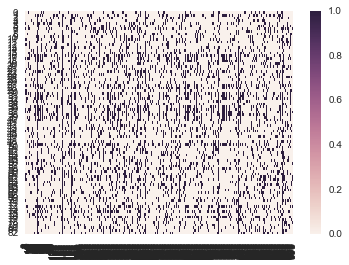

In [7]:
sns.heatmap(X.toarray());

In [8]:
names = vectorizer.get_feature_names()
names[50:100]

[u'american',
 u'american express',
 u'answer',
 u'answers',
 u'apply',
 u'approach',
 u'approach specific',
 u'appropriateness',
 u'appropriateness financial',
 u'area',
 u'areas',
 u'arent',
 u'article',
 u'article generalized',
 u'article originally',
 u'article substitute',
 u'articles',
 u'articles open',
 u'ask',
 u'asked',
 u'asking',
 u'assistance',
 u'attention',
 u'audience',
 u'author',
 u'author necessarily',
 u'author publisher',
 u'authored',
 u'authored articles',
 u'available',
 u'avoid',
 u'aware',
 u'away',
 u'bad',
 u'bank',
 u'based',
 u'based orange',
 u'basic',
 u'basis',
 u'bawden',
 u'bawden daviswriter',
 u'began',
 u'beginning',
 u'believe',
 u'believes',
 u'benefit',
 u'benefits',
 u'best',
 u'better',
 u'big']

In [9]:
# Let's check out which words (tokens) made it into our matrix
tokenized = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
tokenized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Columns: 1000 entries, 000 to youve
dtypes: int64(1000)
memory usage: 648.5 KB


In [10]:
tokens = tokenized.sum().sort_values(ascending=False)
# tokens = pd.DataFrame(tokens)
# tokens.head()
tokens



time                   76
business               75
help                   73
center                 73
alignment              72
pullquote              72
alignment center       72
make                   72
company                70
photo                  68
showtweet false        67
showtweet              67
pullquote showtweet    67
false                  67
like                   64
want                   62
read                   61
articles               60
dont                   59
work                   59
read articles          58
new                    57
people                 54
good                   53
way                    53
istock                 51
just                   49
based                  49
use                    48
need                   48
                       ..
items                   7
unless                  7
language                7
united                  7
leaders                 7
lean                    7
united states           7
youre going 

In [11]:
X_text_features = vectorizer.transform(content)

# Identify the features you want from the original dataset
# other_features_columns = ['article_subtopic']
# other_features = df[other_features_columns]

from scipy.sparse import hstack
X = pd.concat([pd.DataFrame(X_text_features.toarray())], axis=1)
#print X 
#sns.factorplot(data=X, palette="BuPu")



In [38]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10)
vectorizer.fit(content)
X = vectorizer.transform(content).toarray()
y = df['article_subtopic']
y = y.astype(str)

from sklearn import datasets, neighbors, metrics
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='accuracy', cv=6)
print('Accuracy - Score {}, Average Score {}'.format(scores, scores.mean()))



Accuracy - Score [ 0.15        0.10526316  0.26666667  0.36363636  0.33333333  0.22222222], Average Score 0.240186957292


In [39]:
# Get frequencies of the types of articles by article_subtopic
df['article_subtopic'].value_counts()



Customer Relations       12
Leadership               12
Marketing & Sales         9
Company Culture           8
Growth Opportunities      8
Cash Flow                 6
Hiring & HR               6
Strategy                  4
Taxes                     4
Social Media Strategy     3
Research                  3
Operations                3
Financing                 2
Digital Tools             2
Productivity              1
Name: article_subtopic, dtype: int64

In [40]:
df['article_topic'].value_counts()

Building Your Team     26
Getting Customers      26
Planning for Growth    19
Managing Money         12
Name: article_topic, dtype: int64

##### Frequency of topics
Since "Productivity" topic only has one article there is probably not enough information to know what makes a good Productivity article. It is a risk for overfitting. Topics "Customer Relations," "Leadership," and "Marketing & Sales" have enough articles to be considered useful.

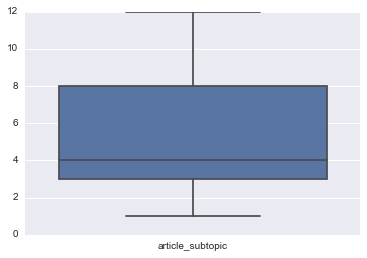

In [41]:
subtopic_freq = pd.DataFrame(df['article_subtopic'].value_counts())
sns.boxplot(data=subtopic_freq)

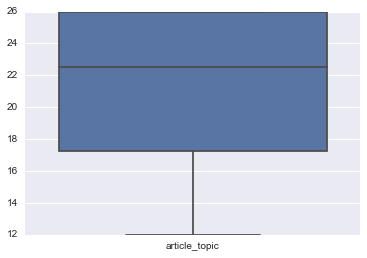

In [42]:
topic_freq = pd.DataFrame(df['article_topic'].value_counts())
sns.boxplot(data=topic_freq)

In [43]:
topic_freq.head()

,article_topic
Building Your Team,26
Getting Customers,26
Planning for Growth,19
Managing Money,12


In [44]:
subtopic_freq.head()

,article_subtopic
Customer Relations,12
Leadership,12
Marketing & Sales,9
Company Culture,8
Growth Opportunities,8


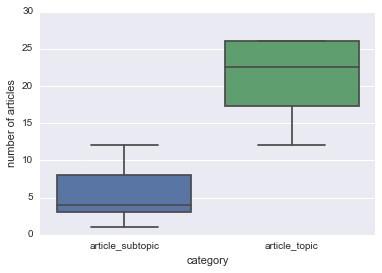

In [48]:
frames = [topic_freq, subtopic_freq]
cat = pd.concat(frames)
cat.head()
ax = sns.boxplot(data=cat)
ax.set(xlabel='category', ylabel='number of articles')
ax

The plot above shows the median amount of articles in a given topic is 4. Outliers are 12, and 1. Most fall between 3 and 8. 

In [46]:
# Create dummies for categorical data article_subtopic  
subtopic_dummies = pd.get_dummies(df['article_subtopic'])
subtopic_dummies.head()


,Cash Flow,Company Culture,Customer Relations,Digital Tools,Financing,Growth Opportunities,Hiring & HR,Leadership,Marketing & Sales,Operations,Productivity,Research,Social Media Strategy,Strategy,Taxes
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# df = pd.concat([df, subtopic_dummies], axis=1);
# df.head()

In [22]:
# plot the distribution of words in one article
hiringhr_df = df.loc[df['article_subtopic'] == 'Hiring & HR']
#hiring_vect = vectorizer.fit(hiringhr_df['content'])
#sns.scatterplot()

#### Examining Authorship

In [23]:
df['author_name'].value_counts()

Julie Bawden Davis          10
Rieva Lesonsky               5
Mike Michalowicz             5
Mike Periu                   5
Bruna Martinuzzi             4
Anne Miller                  4
Geoff Williams               4
Erika Napoletano             4
Cara Cannella                3
John Rampton                 2
Brian Moran                  2
Tim Berry                    2
Kate Silver                  2
Charisse Conanan Johnson     2
Anthonia Akitunde            2
Glen Stansberry              2
Shawn Porat                  1
Rod Kurtz                    1
Mike Trevino                 1
Gabriel Shaoolian            1
Katie Morell                 1
Christopher Conner           1
Mark Henricks                1
Michael Koral                1
Seth Rand                    1
Dean Kaplan                  1
Heather Willems              1
Amy Cortese                  1
David Niu                    1
Greg Sandler                 1
Phaedra Hise                 1
Richard Israel               1
Hal Shel

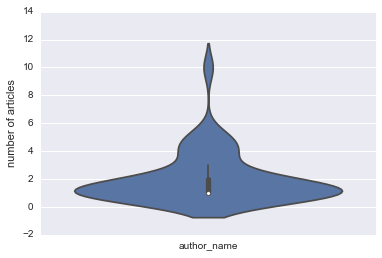

In [50]:
author_freq = pd.DataFrame(df['author_name'].value_counts())
ax = sns.violinplot(data=author_freq)
ax.set(ylabel='number of articles')
ax

Many authors only appear once in the dataset, but Julie Bawden Davis appears frequently. Let's take a look at if she write articles for a particular topic.

In [25]:
julie = df.loc[df['author_name'] == "Julie Bawden Davis"]
julie.head()

,article_description,article_pubtime,article_section,article_subtopic,article_tags,article_topic,author_name,content,title
13,"Floods, storms, earthquakes—no one wants disas...",2016-08-16T22:30:03+00:00,Building Your Team,Leadership,"[Building Your Team, Business Plan, Insurance,...",Building Your Team,Julie Bawden Davis,Is Your Business Prepared for a Natural Disast...,Is Your Business Prepared for a Natural Disaster?
16,Small businesses can be just as volatile as th...,2016-08-23T22:30:24+00:00,Planning for Growth,Strategy,"[Accounts Receivable/Payable, Building Your Te...",Planning for Growth,Julie Bawden Davis,Economic Ups and Downs: How to Help Prepare Yo...,Economic Ups and Downs: How to Help Prepare Yo...
24,"On Veterans Day, and every day, business owner...",2016-11-08T22:00:57+00:00,Building Your Team,Leadership,"[Brainstorming, Building Your Team, Business P...",Building Your Team,Julie Bawden Davis,How Veterans Can Play a Vital Role in Small Bu...,How Veterans Can Play a Vital Role in Small Bu...
26,"Maybe, if your business has grown so much that...",2016-10-24T22:30:22+00:00,Building Your Team,Company Culture,"[Building Your Team, Company Culture, Hiring &...",Building Your Team,Julie Bawden Davis,Is It Time to Hire a CEO?Julie Bawden DavisWri...,Is It Time to Hire a CEO?
49,"In light of recent attacks, cybersecurity is m...",2016-10-28T21:30:59+00:00,Getting Customers,Digital Tools,"[Cybersecurity, Digital Tools, Getting Custome...",Getting Customers,Julie Bawden Davis,How to Help Protect Your Business From Todays ...,How to Help Protect Your Business From Today's...


In [26]:
julie['article_subtopic'].value_counts()

Leadership         4
Company Culture    2
Hiring & HR        2
Strategy           1
Digital Tools      1
Name: article_subtopic, dtype: int64

In [27]:
# sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
# ax = sns.distplot(julie['Leadership'])

In [28]:
rieva = df.loc[df['author_name'] == "Rieva Lesonsky"]
rieva['article_subtopic'].value_counts()


Customer Relations      2
Marketing & Sales       1
Leadership              1
Growth Opportunities    1
Name: article_subtopic, dtype: int64

In [29]:
mikem = df.loc[df['author_name'] == "Mike Michalowicz"]
mikem['article_subtopic'].value_counts()


Leadership            2
Customer Relations    2
Strategy              1
Name: article_subtopic, dtype: int64

In [30]:
mikep = df.loc[df['author_name'] == "Mike Periu"]
mikep['article_subtopic'].value_counts()


Taxes                   2
Financing               1
Growth Opportunities    1
Operations              1
Name: article_subtopic, dtype: int64

### Looking at content tags 

In [31]:
unique_tags = []   

df['article_tags_list'] = df['article_tags'].apply(lambda x: x[1:-1].split(','))
for taglist in df['article_tags_list']:
    for idx, tag in enumerate(taglist):
        if tag[0] == ' ':
            tag = tag[1:]
            taglist[idx] = tag
        if tag not in unique_tags:
            unique_tags.append(tag) 
        

# df['article_tags_list'].apply(lambda x: x[1:] if (x[0] == ' ') else x)
# df['article_tags_list'][0]
print "Length of unique tags:", len(unique_tags)
unique_tags

Length of unique tags: 92


[u'Growth Opportunities',
 u'Innovation',
 u'Personal Productivity',
 u'Planning for Growth',
 u'Productivity',
 u'Business Expansion',
 u'Business Plan',
 u'Cash Flow',
 u'Franchising',
 u'Managing Money',
 u'Operations',
 u'Partnerships',
 u'Risk Assessment',
 u'ROI',
 u'Saving Money',
 u'Strategy',
 u'Best of OPEN Forum',
 u'Recommended Reads',
 u'Advertising',
 u'Brainstorming',
 u'Branding',
 u'Competitive Research',
 u'Critical Numbers',
 u'Customer Engagement',
 u'Customer Feedback',
 u'Customer Relations',
 u'Customer Research',
 u'Finding New Customers',
 u'Getting Customers',
 u'Making a Sale',
 u'Market Research',
 u'Marketing & Sales',
 u'Pivoting',
 u'Research',
 u'Sales Pitches',
 u'Optimize Your Day',
 u'Building Your Team',
 u'Company Culture',
 u'Hiring & HR',
 u'Leadership',
 u'Leadership Skills',
 u'Motivating Employees',
 u'Organizational Productivity',
 u'Team Structure',
 u'Importing & Exporting',
 u'Insurance',
 u'Product Development',
 u'Grow Global',
 u'Legal',

In [32]:
## append tags to dataframe with 1 if the tag is in the row's article_tags list 


# Create dummies for tags 
tag_dummies = pd.get_dummies(unique_tags)

for tag in unique_tags:
    df[tag] = 0
    
for idx, taglist in enumerate(df['article_tags_list']):
    for tag in taglist:
        df.loc[idx, tag] = 1
    
df[df['Twitter'] == 1]

,article_description,article_pubtime,article_section,article_subtopic,article_tags,article_topic,author_name,content,title,article_tags_list,...,Events,Twitter,Networking,PR,Presenting,Work-Life Balance,HR,Firing,Benefits,Healthcare
53,Getting shoppers riled up for a big in-store s...,2016-10-27T14:30:58+00:00,Getting Customers,Social Media Strategy,"[Content Marketing, Customer Engagement, Custo...",Getting Customers,Mike Trevino,How E-Commerce Sites and Storefronts Alike Can...,How E-Commerce Sites and Storefronts Alike Can...,"[Content Marketing, Customer Engagement, Custo...",...,1,1,0,0,0,0,0,0,0,0
61,The social media expert explains how he gets 3...,2016-09-06T17:30:42+00:00,Getting Customers,Social Media Strategy,"[Getting Customers, Social Media Strategy, Twi...",Getting Customers,Bruna Martinuzzi,3 Twitter Marketing Practices for Growing Foll...,3 Twitter Marketing Practices for Growing Foll...,"[Getting Customers, Social Media Strategy, Twi...",...,0,1,0,0,0,0,0,0,0,0
62,The social media strategist and expert gives p...,2016-08-31T13:30:15+00:00,Getting Customers,Social Media Strategy,"[Getting Customers, Marketing & Sales, Social ...",Getting Customers,Bruna Martinuzzi,Neal Schaffer on How to Help Take Your Twitter...,Neal Schaffer on How to Help Take Your Twitter...,"[Getting Customers, Marketing & Sales, Social ...",...,0,1,0,0,0,0,0,0,0,0


In [33]:
pd.crosstab(df['Twitter'], df['Websites'], rownames=['Twitter'], colnames=['Websites'])

Websites,0,1
Twitter,,
0,72,8
1,2,1


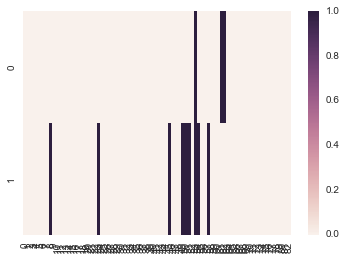

In [34]:
sns.heatmap([df['Twitter'], df['Websites']]);

In [35]:
pd.crosstab(df['Twitter'], df['Facebook'], rownames=['Twitter'], colnames=['Facebook'])

Facebook,0,1
Twitter,,
0,77,3
1,2,1


In [36]:
for tag in unique_tags:
    print tag, ": ", df[tag].sum()

Growth Opportunities :  18
Innovation :  6
Personal Productivity :  5
Planning for Growth :  29
Productivity :  7
Business Expansion :  12
Business Plan :  18
Cash Flow :  15
Franchising :  3
Managing Money :  26
Operations :  13
Partnerships :  4
Risk Assessment :  5
ROI :  3
Saving Money :  6
Strategy :  20
Best of OPEN Forum :  18
Recommended Reads :  14
Advertising :  8
Brainstorming :  8
Branding :  9
Competitive Research :  5
Critical Numbers :  6
Customer Engagement :  21
Customer Feedback :  7
Customer Relations :  21
Customer Research :  4
Finding New Customers :  9
Getting Customers :  32
Making a Sale :  10
Market Research :  4
Marketing & Sales :  20
Pivoting :  9
Research :  7
Sales Pitches :  2
Optimize Your Day :  8
Building Your Team :  34
Company Culture :  17
Hiring & HR :  18
Leadership :  21
Leadership Skills :  17
Motivating Employees :  8
Organizational Productivity :  4
Team Structure :  10
Importing & Exporting :  3
Insurance :  2
Product Development :  11
Grow 

In [37]:
pd.crosstab(df['Growth Opportunities'], 
            [df['Planning for Growth'], 
             df['Grow Global'], 
             df['Ready for Growth']]).apply(lambda r: r/r.sum(), axis=1)

Planning for Growth          0         1                              
Grow Global                  0         0                   1          
Ready for Growth             0         0         1         0         1
Growth Opportunities                                                  
0                     0.815385  0.184615  0.000000  0.000000  0.000000
1                     0.055556  0.666667  0.111111  0.111111  0.055556